## PyTorch exercises

### Tensors

1. Make a tensor of size (2, 17)
2. Make a torch.FloatTensor of size (3, 1)
3. Make a torch.LongTensor of size (5, 2, 1)
  - fill the entire tensor with 7s
4. Make a torch.ByteTensor of size (5,)
  - fill the middle 3 indices with ones such that it records [0, 1, 1, 1, 0]
5. Perform a matrix multiplication of two tensors of size (2, 4) and (4, 2). Then do it in-place.
6. Do element-wise multiplication of two randomly filled $(n_1,n_2,n_3)$ tensors. Then store the result in an Numpy array.

### Forward-prop/backward-prop
1. Create a Tensor that `requires_grad` of size (5, 5).
2. Sum the values in the Tensor.
3. Multiply the tensor by 2 and assign the result to a new python variable (i.e. `x = result`)
4. Sum the variable's elements and assign to a new python variable
5. Print the gradients of all the variables
6. Now perform a backward pass on the last variable (NOTE: for each new python variable that you define, call `.retain_grad()`)
7. Print all gradients again

### Deep-forward NNs
1. Use dl_lab2. In Exercise 12 there, you had to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. Reimplement the manual code in PyTorch.
2. Compare test accuracy using different optimizers: SGD, Adam, Momentum.

In [1]:
import torch
import numpy as np
import torchvision 
from torchvision import transforms 

### Tensors

### 1.

In [2]:
tensor1 = torch.rand(2, 17)
tensor1.shape

torch.Size([2, 17])

### 2.

In [3]:
tensor2 = torch.FloatTensor(3, 1)
tensor2.shape

torch.Size([3, 1])

### 3.

In [4]:
tensor3 = torch.LongTensor(5,2,1)
tensor3.shape

torch.Size([5, 2, 1])

In [5]:
tensor3.fill_(7)
tensor3

tensor([[[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]],

        [[7],
         [7]]])

### 4.

In [6]:
tensor4 = torch.ByteTensor(5,)
tensor4.shape

torch.Size([5])

In [7]:
tensor4[1:4] = 1
tensor4

tensor([0, 1, 1, 1, 0], dtype=torch.uint8)

### 5.

In [8]:
tensor1 = torch.rand(2,4)
tensor2 = torch.rand(4,2)
res = torch.mm(tensor1, tensor2)
res

tensor([[0.2328, 1.4406],
        [0.2609, 1.4993]])

and inplace

In [9]:
result_inplace = torch.empty(2, 2)
torch.mm(tensor1, tensor2, out=result_inplace)

tensor([[0.2328, 1.4406],
        [0.2609, 1.4993]])

### 6.

In [10]:
n1, n2, n3 = 3, 3, 3
tensor1 = torch.rand(n1, n2, n3)
tensor2 = torch.rand(n1, n2, n3)

result_tensor = torch.mul(tensor1, tensor2)
result_numpy = result_tensor.numpy()
print(result_numpy)

[[[0.1169195  0.57007754 0.10199679]
  [0.37254164 0.40750548 0.2822878 ]
  [0.01885814 0.24536014 0.05747709]]

 [[0.01248141 0.5137446  0.04712676]
  [0.0447004  0.2707699  0.724491  ]
  [0.18739711 0.6356564  0.18517412]]

 [[0.53756344 0.23530062 0.04900878]
  [0.37672505 0.12837224 0.06596268]
  [0.16487983 0.5173877  0.2117028 ]]]


### Forward-prop/backward-prop

### 1.

In [11]:
tensor1 = torch.randn(5, 5, requires_grad=True)
tensor1

tensor([[-0.3005, -0.5556, -0.0377, -1.6562,  0.7442],
        [ 0.2451, -0.6666, -1.1579, -0.8364, -0.8886],
        [-0.0393, -0.9568, -2.1288,  0.3304,  1.4015],
        [ 1.2312, -0.7286,  0.9152, -0.0161, -0.7900],
        [ 0.3337, -0.0793,  1.9216,  0.7203,  1.5280]], requires_grad=True)

### 2.

In [12]:
sum_tens = torch.sum(tensor1)
sum_tens.item()

-1.4672749042510986

### 3.

In [13]:
x = tensor1 * 2
x

tensor([[-0.6010, -1.1113, -0.0754, -3.3124,  1.4883],
        [ 0.4902, -1.3331, -2.3158, -1.6729, -1.7773],
        [-0.0785, -1.9136, -4.2575,  0.6608,  2.8029],
        [ 2.4623, -1.4572,  1.8304, -0.0322, -1.5800],
        [ 0.6673, -0.1587,  3.8432,  1.4406,  3.0560]], grad_fn=<MulBackward0>)

### 4.

In [14]:
sum_x = torch.sum(x)
sum_x

tensor(-2.9345, grad_fn=<SumBackward0>)

### 5. 

In [15]:
x.retain_grad()
sum_x.retain_grad()
print(x.grad)
print(sum_x.grad)

None
None


### 6.

In [16]:
sum_x.backward()

### 7.

In [17]:
print(x.grad)
print(sum_x.grad)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor(1.)


### Deep-forward NNs

### 1.

In [18]:
import torch.nn as nn
import torch.nn.init as init
class DeepNeuralNetwork(nn.Module):
    def __init__(self, layer_dims):
        super(DeepNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(1, len(layer_dims) - 1):
            linear_layer = nn.Linear(layer_dims[i-1], layer_dims[i])
            init.xavier_uniform_(linear_layer.weight)
            self.layers.append(linear_layer)
            self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(layer_dims[-2], layer_dims[-1]))
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def compute_cost(self, predictions, targets):
        criterion = nn.BCELoss()
        return criterion(predictions, targets)
    
    def train_model(self, X_train, y_train, learning_rate=0.01, num_epochs=100, optimizer = "SGD"):
        if optimizer == "SGD":
            optimizer = optim.SGD(self.parameters(), lr=learning_rate)
        elif optimizer == "Adam":
            optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        elif optimizer >=0 and optimizer <=1:
            optimizer = optim.SGD(self.parameters(), lr=learning_rate, momentum = optimizer)
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            predictions = self(X_train)
            cost = self.compute_cost(predictions.T, y_train)
            cost.backward()
            optimizer.step()
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Cost: {cost.item()}')

In [19]:
from dnn_app_utils_v3 import *
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward, load_data
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
train_x = train_x.T
test_x = test_x.T
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


y = 1. It's a cat picture.


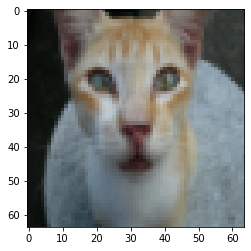

In [20]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [21]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
train_x = torch.tensor(train_x).float()
train_y = torch.tensor(train_y).float()
test_x = torch.tensor(test_x).float()
test_y = torch.tensor(test_y).float()

In [22]:
import torch.optim as optim
model = DeepNeuralNetwork(layers_dims)

model.train_model(train_x, train_y, learning_rate = 0.0075, num_epochs = 3500)

Epoch 0, Cost: 0.7921417355537415
Epoch 100, Cost: 0.605525016784668
Epoch 200, Cost: 0.503503143787384
Epoch 300, Cost: 0.4747144281864166
Epoch 400, Cost: 0.4210197329521179
Epoch 500, Cost: 0.3715406358242035
Epoch 600, Cost: 0.32757237553596497
Epoch 700, Cost: 0.296889990568161
Epoch 800, Cost: 0.4356524348258972
Epoch 900, Cost: 0.10044093430042267
Epoch 1000, Cost: 1.0608700513839722
Epoch 1100, Cost: 0.048275090754032135
Epoch 1200, Cost: 0.03271828219294548
Epoch 1300, Cost: 0.023364242166280746
Epoch 1400, Cost: 0.01766926981508732
Epoch 1500, Cost: 0.013870556838810444
Epoch 1600, Cost: 0.011181972920894623
Epoch 1700, Cost: 0.009245739318430424
Epoch 1800, Cost: 0.007775407284498215
Epoch 1900, Cost: 0.006656476762145758
Epoch 2000, Cost: 0.00577118992805481
Epoch 2100, Cost: 0.00507472176104784
Epoch 2200, Cost: 0.004500807262957096
Epoch 2300, Cost: 0.004028468392789364
Epoch 2400, Cost: 0.0036365280393511057
Epoch 2500, Cost: 0.0033038421534001827
Epoch 2600, Cost: 0.003

In [23]:
def accuracy(y_true, y_pred):
    bin_predictions = torch.round(y_pred)
    correct_predictions = torch.sum(bin_predictions.T == y_true)
    accuracy = correct_predictions.item() / y_true.size(1)
    return accuracy
with torch.no_grad():  
    y_test_pred = model(test_x)
    y_train_pred = model(train_x)
print("-"*20 + " SGD optimizer " + "-"*20)
print(f"Test Accuracy:{accuracy(test_y, y_test_pred)}")
print(f"Train Accuracy:{accuracy(train_y, y_train_pred)}")

-------------------- SGD optimizer --------------------
Test Accuracy:0.72
Train Accuracy:1.0


### 2.

Let's use Adam optimizer

In [24]:
model2 = DeepNeuralNetwork(layers_dims)
model2.train_model(train_x, train_y, learning_rate = 0.005, num_epochs = 2500, optimizer = "Adam")

Epoch 0, Cost: 0.737436830997467
Epoch 100, Cost: 0.6558946967124939
Epoch 200, Cost: 0.6485785245895386
Epoch 300, Cost: 0.6405375599861145
Epoch 400, Cost: 0.46855810284614563
Epoch 500, Cost: 0.20199616253376007
Epoch 600, Cost: 0.018266182392835617
Epoch 700, Cost: 0.006985791958868504
Epoch 800, Cost: 0.003965394105762243
Epoch 900, Cost: 0.0026962831616401672
Epoch 1000, Cost: 0.0019024788634851575
Epoch 1100, Cost: 0.0014455097261816263
Epoch 1200, Cost: 0.0011354072485119104
Epoch 1300, Cost: 0.0009162159403786063
Epoch 1400, Cost: 0.00076035235542804
Epoch 1500, Cost: 0.0006326824077405035
Epoch 1600, Cost: 0.00053844612557441
Epoch 1700, Cost: 0.00046439922880381346
Epoch 1800, Cost: 0.0004055427561979741
Epoch 1900, Cost: 0.0003529141249600798
Epoch 2000, Cost: 0.00031126904650591314
Epoch 2100, Cost: 0.00027611610130406916
Epoch 2200, Cost: 0.00024593857233412564
Epoch 2300, Cost: 0.00022185246052686125
Epoch 2400, Cost: 0.00019793506362475455


In [25]:
with torch.no_grad():  
    y_test_pred = model2(test_x)
    y_train_pred = model2(train_x)
print("-"*20 + " Adam optimizer " + "-"*20)
print(f"Test Accuracy:{accuracy(test_y, y_test_pred)}")
print(f"Train Accuracy:{accuracy(train_y, y_train_pred)}")

-------------------- Adam optimizer --------------------
Test Accuracy:0.72
Train Accuracy:1.0


Let's use Momentum optimizer

In [26]:
model3 = DeepNeuralNetwork(layers_dims)
model3.train_model(train_x, train_y, learning_rate = 0.007, num_epochs = 3000, optimizer = 0.5)

Epoch 0, Cost: 0.7483354210853577
Epoch 100, Cost: 0.6151711940765381
Epoch 200, Cost: 0.46447768807411194
Epoch 300, Cost: 0.3195006549358368
Epoch 400, Cost: 0.29304638504981995
Epoch 500, Cost: 0.19312447309494019
Epoch 600, Cost: 0.21074864268302917
Epoch 700, Cost: 0.15577033162117004
Epoch 800, Cost: 0.1353461593389511
Epoch 900, Cost: 0.08252840489149094
Epoch 1000, Cost: 0.028079751878976822
Epoch 1100, Cost: 0.011659007519483566
Epoch 1200, Cost: 0.007541985251009464
Epoch 1300, Cost: 0.005637288559228182
Epoch 1400, Cost: 0.004510965663939714
Epoch 1500, Cost: 0.00374523620121181
Epoch 1600, Cost: 0.0031947914976626635
Epoch 1700, Cost: 0.0027768348809331656
Epoch 1800, Cost: 0.002447043312713504
Epoch 1900, Cost: 0.0021816077642142773
Epoch 2000, Cost: 0.0019636894576251507
Epoch 2100, Cost: 0.0017821597866714
Epoch 2200, Cost: 0.0016294120578095317
Epoch 2300, Cost: 0.0014982465654611588
Epoch 2400, Cost: 0.001384860253892839
Epoch 2500, Cost: 0.001285953912883997
Epoch 260

In [27]:
with torch.no_grad():  
    y_test_pred = model3(test_x)
    y_train_pred = model3(train_x)
print("-"*20 + " Momentum optimizer " + "-"*20)
print(f"Test Accuracy:{accuracy(test_y, y_test_pred)}")
print(f"Train Accuracy:{accuracy(train_y, y_train_pred)}")

-------------------- Momentum optimizer --------------------
Test Accuracy:0.78
Train Accuracy:1.0


### Results

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        72%
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        78%
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        72%
        </td>
    </tr>
</table> 